In [2]:
%matplotlib inline

from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


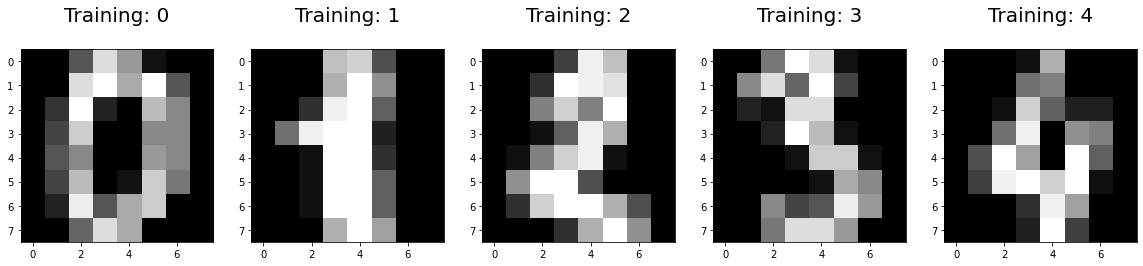

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n'%label, fontsize=20)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                   test_size=0.25, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

logistiRegr = LogisticRegression() #모델 선언
logistiRegr.fit(x_train, y_train) #모델 훈련

/opt/homebrew/anaconda3/envs/fire_base/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
x_test[0]

array([ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
       15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
        0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
        0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.])

In [18]:
x_test[0].reshape(1,-1)

array([[ 0.,  0.,  0.,  7., 12.,  0.,  0.,  0.,  0.,  0.,  4., 16.,  8.,
         0.,  0.,  0.,  0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  0.,
        15., 10.,  8.,  6.,  1.,  0.,  0.,  0., 15., 16.,  8., 10.,  8.,
         0.,  0.,  0., 14.,  7.,  0.,  0., 12.,  0.,  0.,  0.,  8., 11.,
         0.,  5., 16.,  2.,  0.,  0.,  0.,  9., 14., 14.,  5.,  0.]])

In [19]:
logistiRegr.predict(x_test[0].reshape(1,-1)) #x_test에 대한 결과를 numpy 배열로 변환
logistiRegr.predict(x_test[0:10]) #예측값을 한번에 출력

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [20]:
predictions = logistiRegr.predict(x_test) #x_test에 대한 예측
score = logistiRegr.score(x_test, y_test) #스코어 메소드를 활용한 성능 측정
print(score)

0.9733333333333334


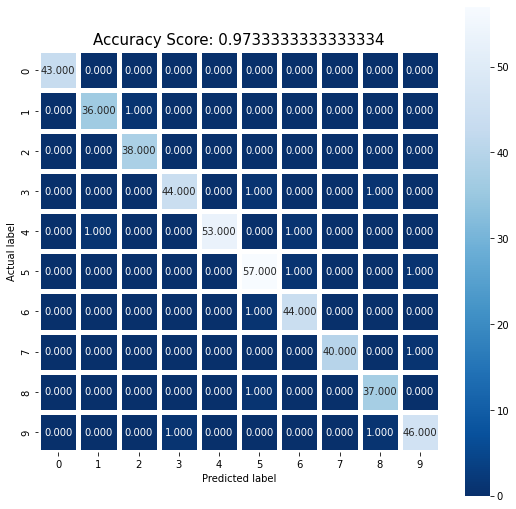

In [24]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions) #예측값과 실제값을 넣어 혼동행렬 생성
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15)
plt.show()